In [59]:
import numpy as np
from skimage.data import shepp_logan_phantom
import matplotlib.pyplot as plt
from tqdm import tqdm

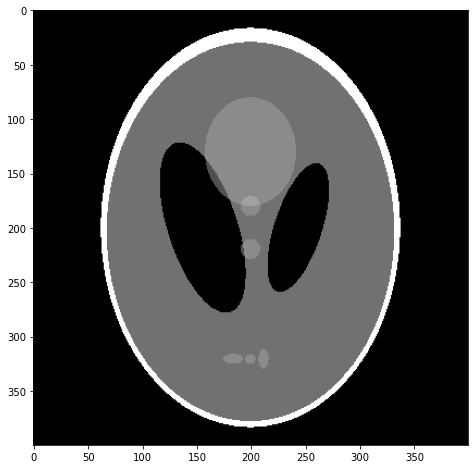

In [72]:
# create a phantom and k-space data (ground truth)
plt.figure(1, figsize=(8, 8))
P = shepp_logan_phantom()
plt.imshow(abs(P)**0.5, cmap='gray', aspect='equal')
plt.show()

### Its a 400x400 image in Python skimage, not 256x256 as given in the MATLAB code.

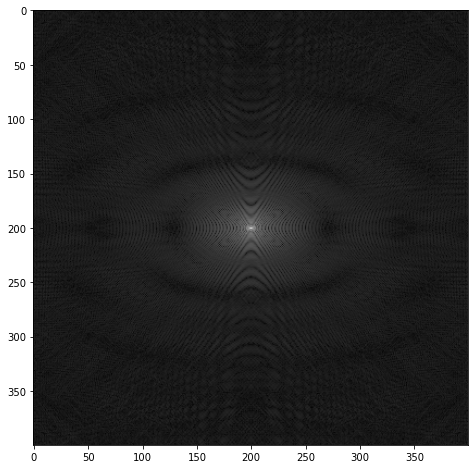

In [73]:
kSpaceData = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(P)))
plt.figure(2, figsize=(8, 8))
plt.imshow(abs(kSpaceData)**0.3, cmap='gray', aspect='equal')
plt.show()

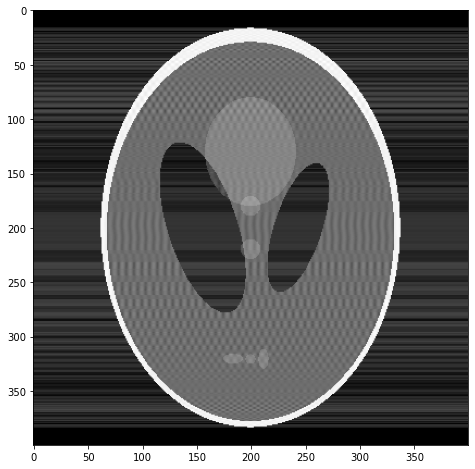

In [74]:
# simulate a case where part of the k-space data is corrupted
kSpaceData_corrupted = kSpaceData.copy()
kSpaceData_corrupted[:,256] = kSpaceData[:,256]*10                   # The matlab code has 180th line corrupted but here we choose the 256th line as corruption.
P_corrupted = np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(kSpaceData_corrupted)))
plt.figure(3, figsize=(8, 8))
plt.imshow(abs(P_corrupted)**0.5, cmap='gray', aspect='equal')
plt.show()

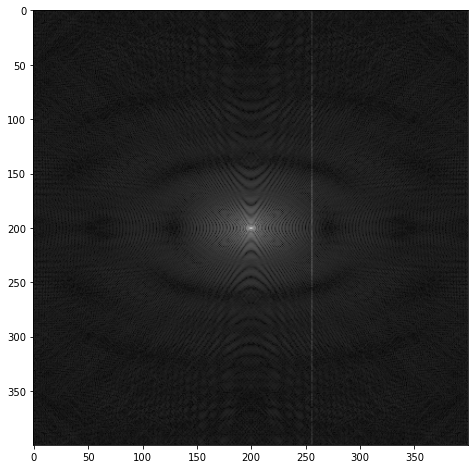

In [75]:
plt.figure(4, figsize=(8, 8))
plt.imshow(abs(kSpaceData_corrupted)**0.3, cmap='gray', aspect='equal')
plt.show()

In [23]:
# assuming that we know that line#180 of the k-space data is corrupted but don't know the correct value. 
# We will use an iterative approach to produce an image with reduced artifact

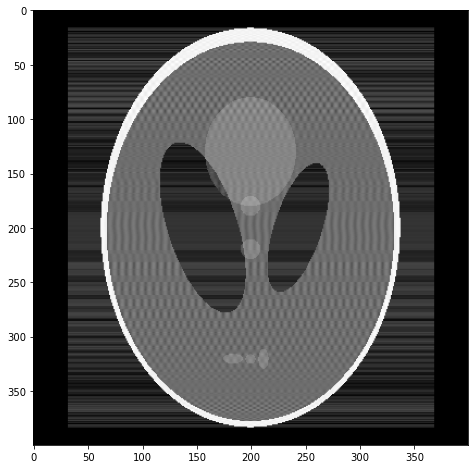

In [76]:
# Step 1:
corruped_image = P_corrupted.copy()
corruped_image_fixed = corruped_image.copy()
corruped_image_fixed[:,np.r_[0:32,-31:0]] = 0

plt.figure(5, figsize=(8, 8))
plt.imshow(abs(corruped_image_fixed)**0.5, cmap='gray', aspect='equal')
plt.show()

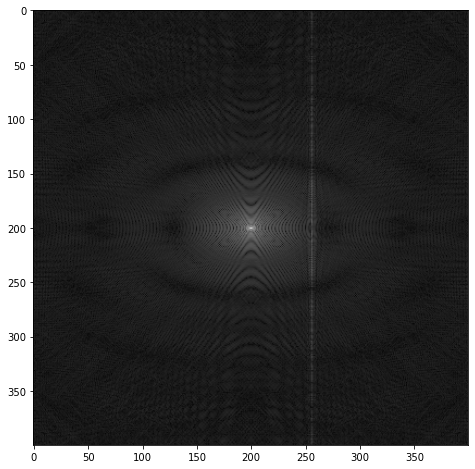

In [77]:
corrupted_kdata_fixed = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(corruped_image_fixed)))
plt.figure(6, figsize=(8, 8))
plt.imshow(abs(corrupted_kdata_fixed)**0.3, cmap='gray', aspect='equal')
plt.show()

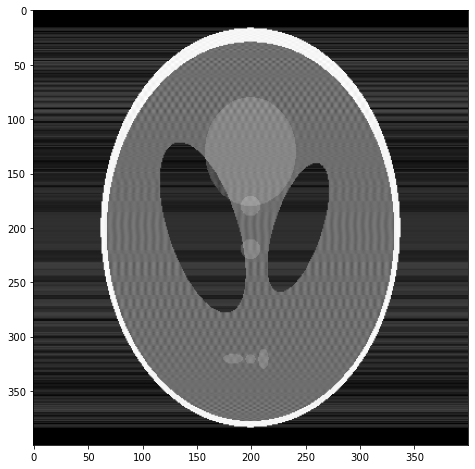

In [78]:
# Step 2:
corrupted_kdata_fixed_again = kSpaceData_corrupted.copy()
corrupted_kdata_fixed_again[:,256] = corrupted_kdata_fixed[:,256]
corruped_image_fixed_again = np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(corrupted_kdata_fixed_again)))
plt.figure(7, figsize=(8, 8))
plt.imshow(abs(corruped_image_fixed_again)**0.5, cmap='gray', aspect='equal')
plt.show()

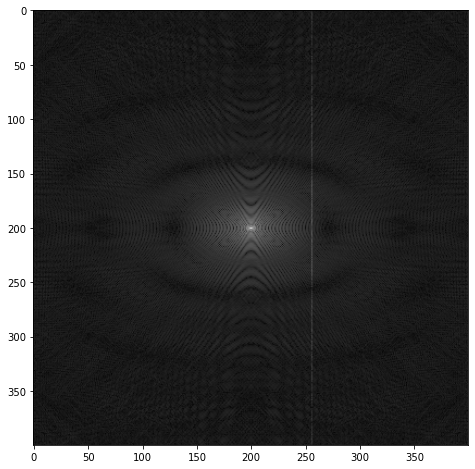

In [79]:
plt.figure(8, figsize=(8, 8))
plt.imshow(abs(corrupted_kdata_fixed_again)**0.3, cmap='gray', aspect='equal')
plt.show()

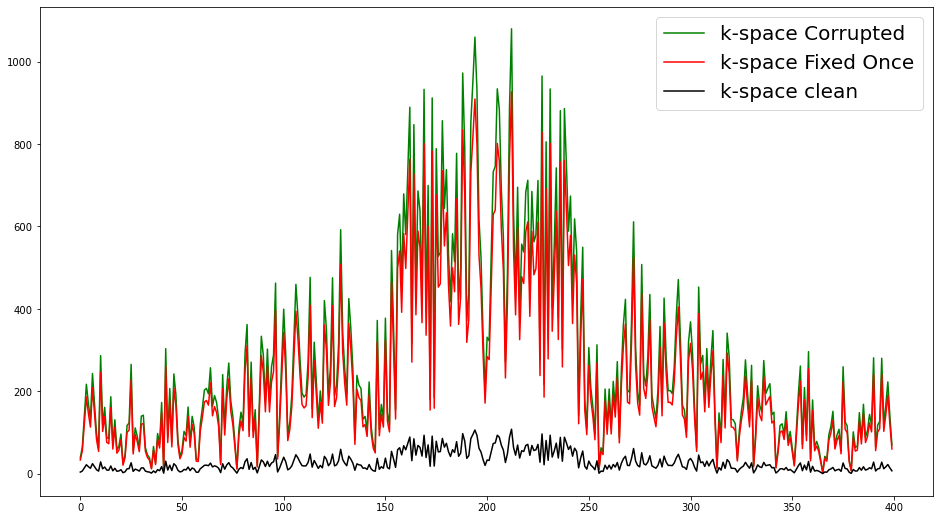

In [80]:
# check:
plt.figure(13, figsize=(16, 9))
plt.plot(range(400), abs(kSpaceData_corrupted[:,256]), "g",range(400), abs(corrupted_kdata_fixed_again[:,256]), "r",range(400), abs(kSpaceData[:,256]), "k")
plt.legend(['k-space Corrupted ','k-space Fixed Once','k-space clean'], prop = { "size": 20 })
plt.show()

## Some improvement

### Since the k-data are improved, the above listed procedure could be repeated!

In [81]:
steps = 200

for cnt in tqdm(range(steps)):
    # Step 1a:
    corruped_image = corruped_image_fixed_again.copy()
    corruped_image_fixed = corruped_image.copy()
    corruped_image_fixed[:,np.r_[0:32,-31:0]] = 0
    corrupted_kdata_fixed = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(corruped_image_fixed)))
    # Step 2a:
    corrupted_kdata_fixed_again = kSpaceData_corrupted.copy()
    corrupted_kdata_fixed_again[:,256] = corrupted_kdata_fixed[:,256]
    corruped_image_fixed_again = np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(corrupted_kdata_fixed_again)))


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 122.89it/s]


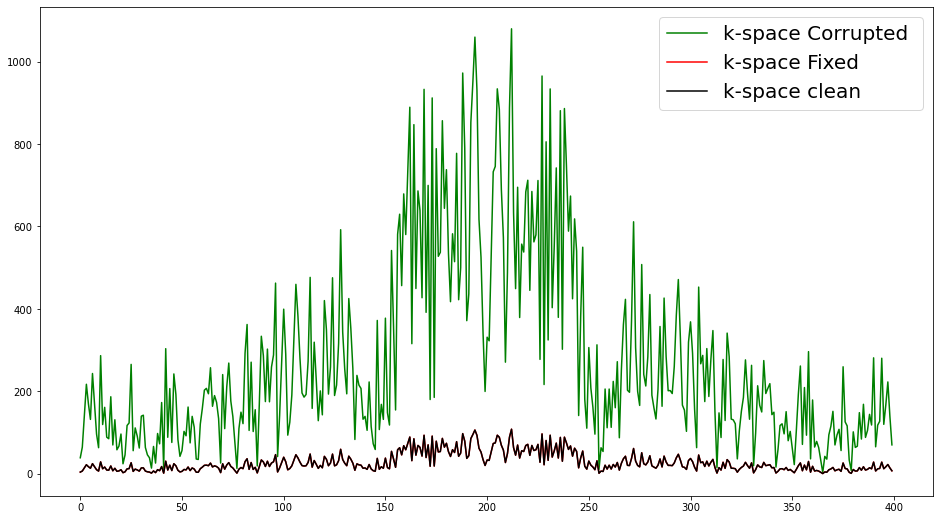

In [82]:
### check
# check:
plt.figure(13, figsize=(16, 9))
plt.plot(range(400), abs(kSpaceData_corrupted[:,256]), "g", range(400), abs(corrupted_kdata_fixed_again[:,256]), "r", range(400), abs(kSpaceData[:,256]), "k")
plt.legend(['k-space Corrupted ','k-space Fixed','k-space clean'], prop = { "size": 20 })
plt.show()

## looks good -- the k-data are getting very close to the ground truth

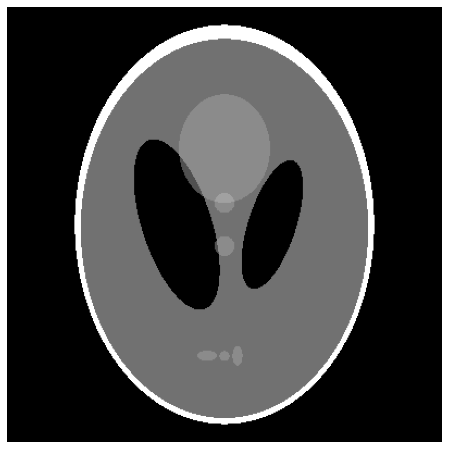

In [83]:
plt.figure(13, figsize=(8, 8))
plt.imshow(abs(corruped_image_fixed_again) ** 0.5, cmap="gray")
plt.axis("off")
plt.show()

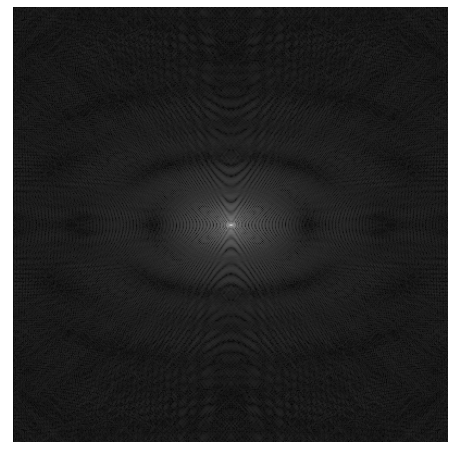

In [84]:
plt.figure(14, figsize=(8, 8))
plt.imshow(abs(corrupted_kdata_fixed_again) ** 0.3, cmap="gray")
plt.axis("equal")
plt.axis("off")
plt.show()